In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import dowhy
from dowhy import CausalModel
import dowhy.datasets, dowhy.plotter

In [76]:
df = pd.read_csv('data/data.csv')

In [77]:
causal_df = df.drop(['id', 'Unnamed: 32'], axis=1).copy()

In [78]:
d = {'B':0, 'M':1}
causal_df['diagnosis'] = causal_df['diagnosis'].map(d)

In [79]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(causal_df, random_state=20, test_size=.2)

In [80]:
train_df.shape

In [81]:
xs = train_df.iloc[:,2:].columns.tolist()

In [82]:
# Create a causal model from the data and given common causes.

model=CausalModel(
        data = train_df,
        treatment='diagnosis',
        outcome='radius_mean',
        common_causes=xs
        )

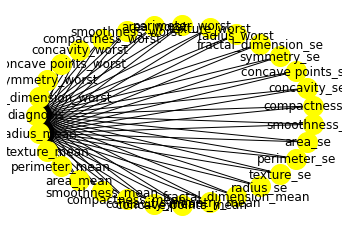

In [83]:
model.view_model()

In [84]:
#Identify the causal effect
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(radius_mean|smoothness_mean,perimeter_se,area_mean,ar
d[diagnosis]                                                                  

                                                                              
ea_worst,concave points_worst,concave points_mean,concavity_worst,symmetry_wor
                                                                              

                                                                              
st,fractal_dimension_worst,smoothness_worst,radius_worst,texture_mean,fractal_
                                                                              

                                                                              
dimension_mean,perimeter_worst,concavity_se,compactness_worst,concave points_s
                                

In [58]:
# Estimate the causal effect and compare it with Average Treatment Effect
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression", test_significance=True
)

print(estimate)

print("Causal Estimate is " + str(estimate.value))
data_1 = train_df[train_df["diagnosis"]==1]
data_0 = train_df[train_df["diagnosis"]==0]

print("ATE", np.mean(data_1["radius_mean"])- np.mean(data_0["radius_mean"]))

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(radius_mean|smoothness_mean,perimeter_se,area_mean,ar
d[diagnosis]                                                                  

                                                                              
ea_worst,concave points_worst,concave points_mean,concavity_worst,symmetry_wor
                                                                              

                                                                              
st,fractal_dimension_worst,smoothness_worst,radius_worst,texture_mean,fractal_
                                                                              

                                                                              
dimension_mean,perimeter_worst,concavity_se,compactness_worst,c

In [61]:
refute_results=model.refute_estimate(identified_estimand, estimate,
        method_name="random_common_cause")
print(refute_results)

Refute: Add a Random Common Cause
Estimated effect:-0.026179280696220886
New effect:-0.02627374699041951



In [62]:
res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

Refute: Use a Placebo Treatment
Estimated effect:-0.026179280696220886
New effect:0.0010272587874021965
p value:0.46



In [63]:
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

Refute: Use a subset of data
Estimated effect:-0.026179280696220886
New effect:-0.02630367061375857
p value:0.48

